# Conditional entropy of natural languages

In [1]:
from glob import glob

In [2]:
def load_file(path):
    f = open(path, "r")
    return f.read()

In [3]:
lang_names = ["English", "Estonian", "Esperanto", "Haitian", "Latin", "Navaho", "Somali"]
lang_dict = {lang: load_file(path) for lang, path in zip(lang_names, glob("norm*"))}

In [4]:
samples = [load_file(path) for path in glob("sample*")]

In [5]:
alphabet = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ']
digits = [str(digit) for digit in range(10)]
alphabet_digits = alphabet+digits

### Conditional entropy formula
H(Y|X) = − $\sum_{x∈X,y∈Y} p(x, y)$ · log p(y|x)

>When applying the above definition to the analysis of language, p(x, y) is
the joint probability of an n-gram x and a following character/word y against
all other possible (n+1)-grams in the corpus, and p(y|x) is the probability
of y occurring after x.



In [6]:
from math import log

In [7]:
def conditional_entropy_chars(source_text, max_order) -> list:
    conditional_entropies = []
    order_dict_chars = {0: {'': 1}} # initiate order_dict_chars with only empty sign for 0th order 

    # generate dictionary of {ngram: number of occurences} for each order.
    for rank in range(1, max_order+2): # generate one order more than the max_order, so that it is possible to count conditional entropy.
        for i in range(len(source_text)-rank+1):
            n_gram = source_text[i:i+rank]
            if order_dict_chars.get(rank):
                if order_dict_chars[rank].get(n_gram):
                    order_dict_chars[rank][n_gram] += 1
                else:
                    order_dict_chars[rank][n_gram] = 1
            else:
                order_dict_chars[rank] = {n_gram: 1}
    
    order = 0
    while order_dict_chars.get(order+1):
        total = 0.0
        word_count = sum(order_dict_chars[order+1].values())
        for x in order_dict_chars[order].keys():
            conditional_count = sum([order_dict_chars[order+1].get(x+i) for i in alphabet_digits if order_dict_chars[order+1].get(x+i)]) 
            if conditional_count > 0:  
                for y in alphabet_digits:
                    pxy = order_dict_chars[order+1].get(x+y, 0)/word_count
                    p_cond = order_dict_chars[order+1].get(x+y,0)/conditional_count
                    if p_cond > 0:
                        total += pxy*log(p_cond, 2)
        conditional_entropies.append(-total)
        order += 1

    return conditional_entropies


In [8]:
def conditional_entropy_words(source_text, max_order) -> list:
    from math import log
    conditional_entropies = []
    order_dict_words = {0: {'': 1}} # initiate order_dict_words with only empty sign for 0th order 
    source_list = source_text.split()
    # generate dictionary of {sequence: number of occurrences} for each order.
    for rank in range(1, max_order+2): # generate one order more than the max_order, so that it is possible to count conditional entropy.
        for i in range(len(source_list)-rank+1):
            word = ' '.join(source_list[i:i+rank])
            if order_dict_words.get(rank):
                if order_dict_words[rank].get(word):
                    order_dict_words[rank][word] += 1
                else:
                    order_dict_words[rank][word] = 1
            else:
                order_dict_words[rank] = {word: 1}
    order = 0
    while order_dict_words.get(order+1):
        total = 0.0
        word_count = sum(order_dict_words[order+1].values())
        for x in order_dict_words[order].keys():
            if order > 0:
                conditional_count = sum([order_dict_words[order+1].get(i, 0) for i in order_dict_words[order+1].keys() if i.startswith(x+' ')]) 
                if conditional_count > 0:  
                    for y in order_dict_words[1].keys():
                        if order > 0:
                            pxy = order_dict_words[order+1].get(x+' '+y, 0)/word_count
                            p_cond = order_dict_words[order+1].get(x+' '+y,0)/conditional_count
                        else:
                            pxy = order_dict_words[order+1].get(y, 0)/word_count
                            p_cond = order_dict_words[order+1].get(y,0)/conditional_count
                        if p_cond > 0:
                            total += pxy*log(p_cond, 2)
            else:
                conditional_count = word_count
                for y in order_dict_words[1].keys():
                    pxy = order_dict_words[order+1].get(y, 0)/word_count
                    p_cond = order_dict_words[order+1].get(y,0)/conditional_count
                    if p_cond > 0:
                        total += pxy*log(p_cond, 2)

        conditional_entropies.append(-total)
        order += 1
    
    return conditional_entropies

In [11]:
import matplotlib.pyplot as plt 
from matplotlib import cm

In [12]:
cmap = cm.get_cmap('viridis')

/tmp/ipykernel_419/3960353949.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


In [15]:
def generate_entropy_plot(source_text, max_order, name, color):
    plt.plot(range(max_order+1), conditional_entropy_chars(source_text, max_order), linewidth=3, marker='o', color=color, label="Characters entropy")
    plt.plot(range(max_order+1), conditional_entropy_words(source_text, max_order), linewidth=3, marker='o', linestyle='--', color=color, label="Words entropy")
    plt.xticks(range(max_order+1))
    plt.title(f"{name} Entropy Analysis")
    plt.xlabel("Rank")
    plt.ylabel("Entropy [bits]")
    plt.legend()
    plt.show()

### Analysis of entropy on languages

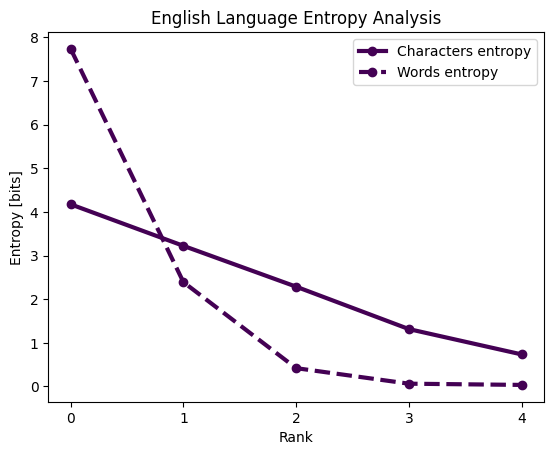

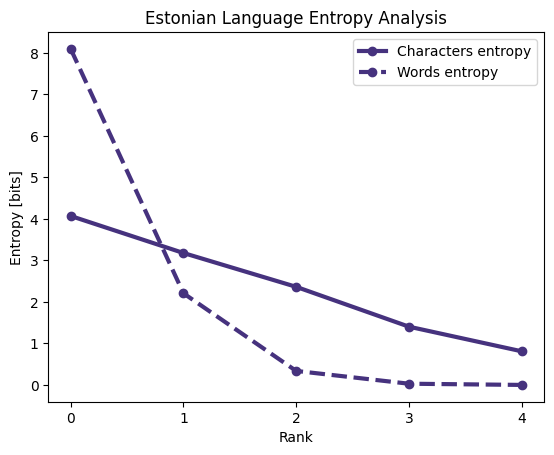

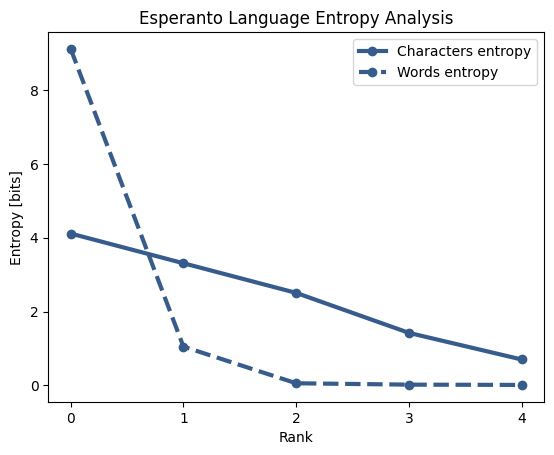

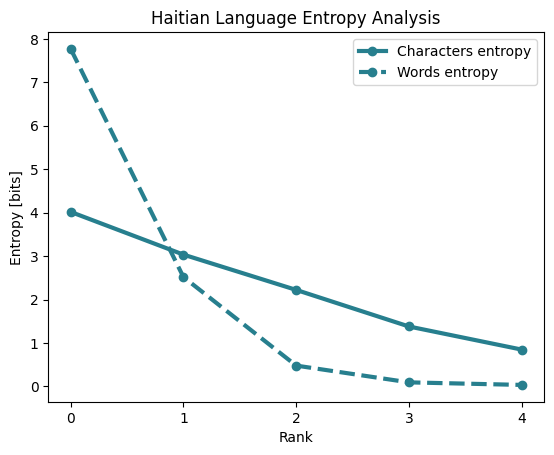

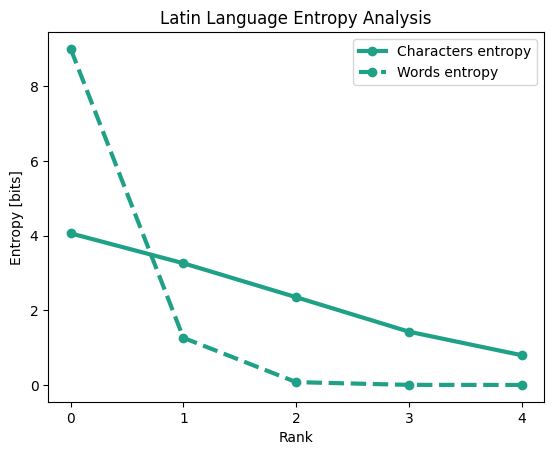

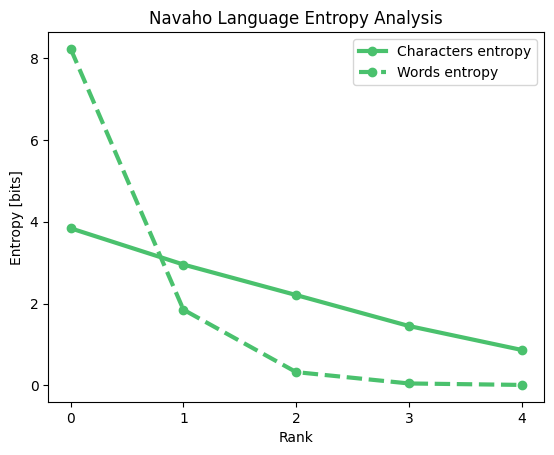

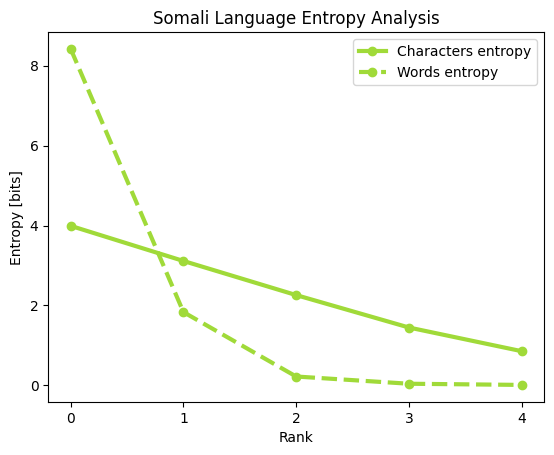

In [42]:
for i, (lang, text) in enumerate(lang_dict.items()):
    generate_entropy_plot(text, 4, lang + " Language", cmap(i/len(lang_dict.keys())))

### Analysis of entropy on text samples

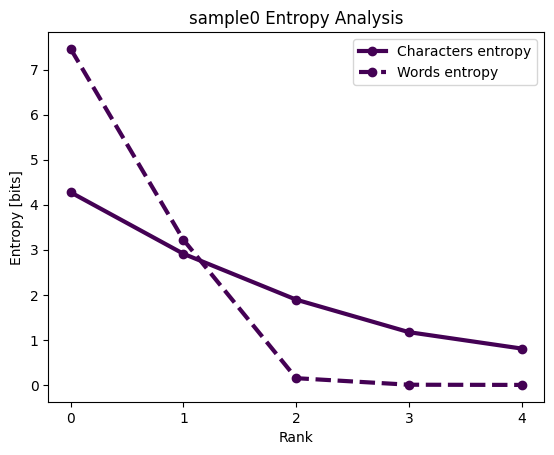

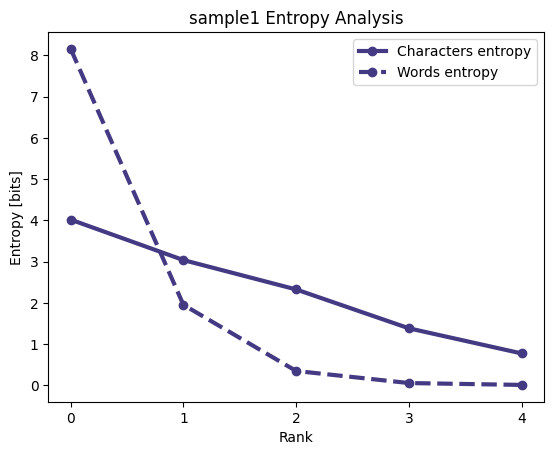

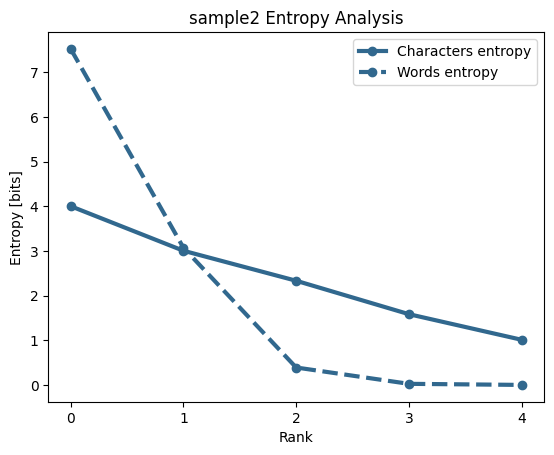

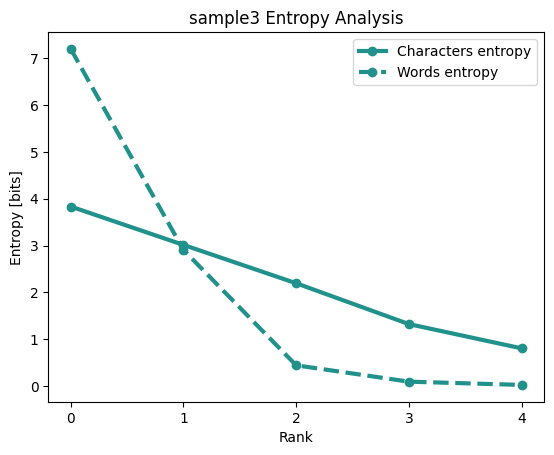

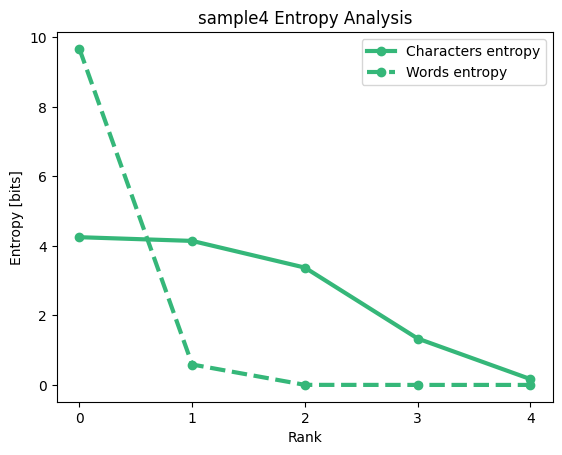

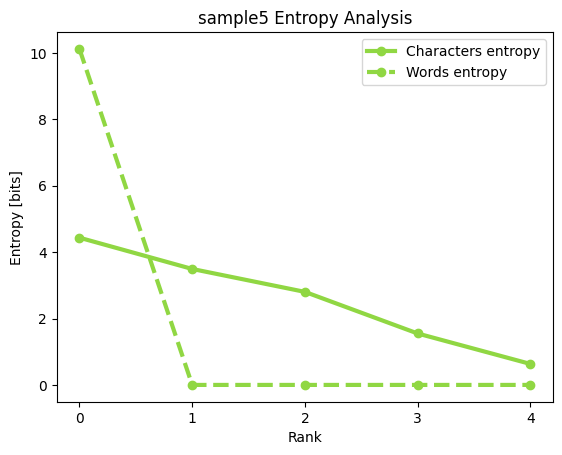

In [47]:
for i, text in enumerate(samples):
    generate_entropy_plot(text, 4, f"sample{i}", cmap(i/len(samples)))

In [18]:
def generate_comparison_plot(max_rank, func):    
    for i, sample in enumerate(samples):
        y = func(sample, max_rank)
        if y != sorted(y, reverse=True): # if entropy is not a non-increasing sequence, print a warning.
            print(f"sample{i} does not contain a natural language.")
        plt.plot(range(max_rank+1), y, linewidth=3, marker='o', color=cmap(i/len(samples)), label=f"sample{i}")
    plt.fill_between(range(max_rank+1), func(lang_dict["English"], max_rank), func(lang_dict["Latin"], max_rank), alpha=0.2, label="Space between English and Latin languages")
    plt.xticks(range(max_rank+1))
    if func == conditional_entropy_chars:
        plt.title(f"Samples Entropy Analysis on Characters")
    elif func == conditional_entropy_words:
        plt.title(f"Samples Entropy Analysis on Words")
    plt.xlabel("Rank")
    plt.ylabel("Entropy [bits]")
    plt.legend()
    plt.show()
    plt.close()

### Comparison of all 6 samples 

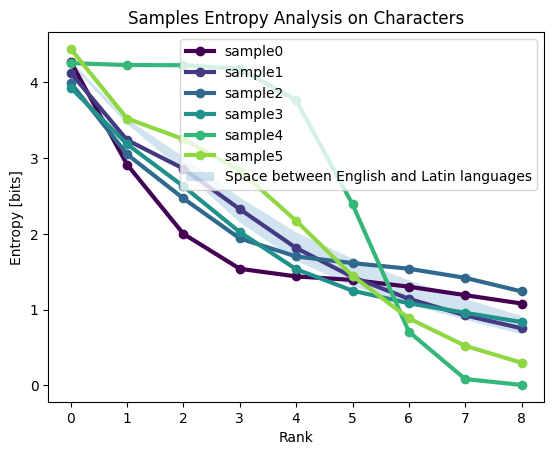

In [17]:
generate_comparison_plot(8, conditional_entropy_chars)

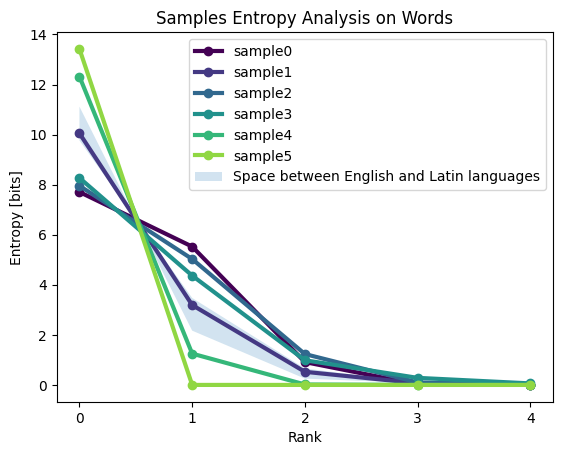

In [17]:
generate_comparison_plot(4, conditional_entropy_words)

## Conclusion
Comparing the above plots, I would opt for the following arrangement:

**sample0** - does **NOT** contain NL

**sample1** - contains NL 

**sample2** - does **NOT** contain NL

**sample3** - contains NL

**sample4** - does **NOT** contain NL

**sample5** - does **NOT** contain NL

### Explanation:

- sample0 - this one was tricky. In the character plot it is clearly indicating a rapid decline of entropy from 0th to 2nd order. Additionally, we can notice that in the word analysis plot, it gains particularly little information from the 1st order analysis. Then it suddenly gains a lot of information from the second order, which comprehensively makes the curvature rather suspicious.

- sample2 - sample2 is a bit too convex in the words analysis. Additionally, after 8 iterations of conditional entropy calculation, it is still relatively unpredictable.

- sample4 - considering the characters entropy, this one looks very alarming. Basically it doesn't gain almost any information until it reaches 4th order, which is a quite alarming phenomenon. In the words analysis, this plot looks unusual. 

- sample5 - simply by looking at analysis on words, we can see that this one is basically solved after 1st order. Analysis of characters looks slightly confusing.

Taking the rest of the plots into the account, I think that they look rather acceptable. Also, they align with the space between other languages pretty accurately. 